In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Processed Data
df = pd.read_parquet('../data/processed_data.parquet')

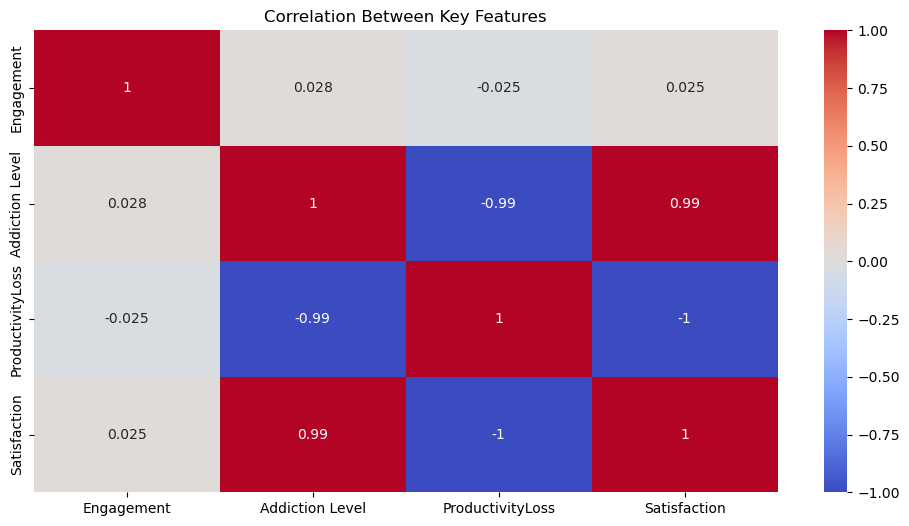

In [3]:
# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Engagement', 'Addiction Level', 'ProductivityLoss', 'Satisfaction']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Features')
plt.savefig('../data/visualizations/correlation_matrix.png')
plt.show()

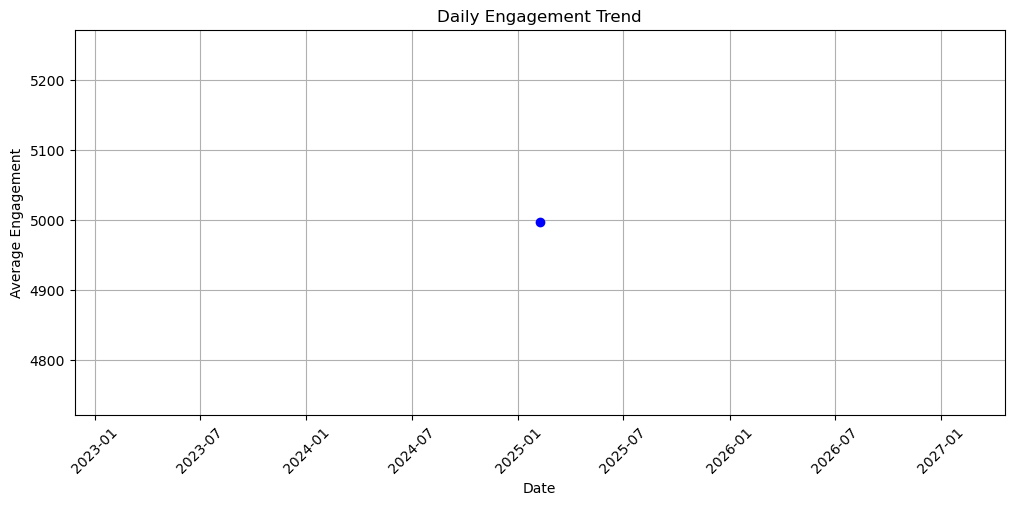

In [5]:
# Time-Series Analysis (Engagement Trends)
df['Watch Time'] = pd.to_datetime(df['Watch Time'])  # Convert to datetime
df_timeseries = df.groupby(df['Watch Time'].dt.date)['Engagement'].mean()

plt.figure(figsize=(12, 5))
plt.plot(df_timeseries, marker='o', linestyle='-', color='b')
plt.title('Daily Engagement Trend')
plt.xlabel('Date')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('../data/visualizations/engagement_trend.png')
plt.show()

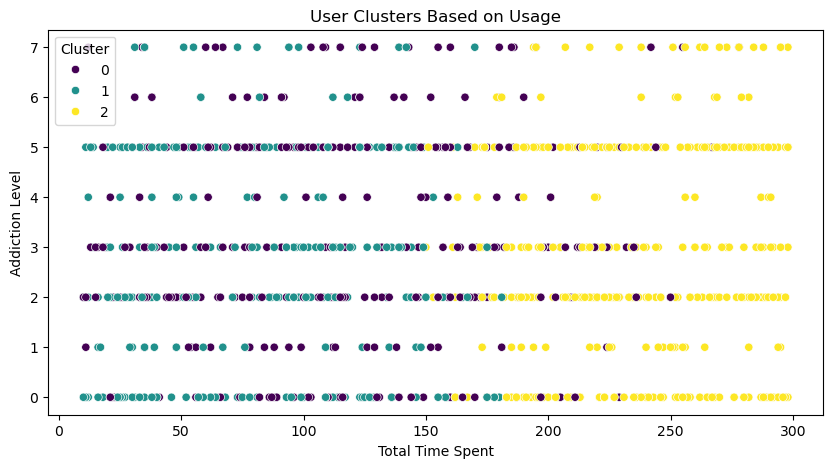

In [6]:
# Clustering Users Based on Behavior
features = df[['Total Time Spent', 'Number of Sessions', 'Addiction Level']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Total Time Spent', y='Addiction Level', hue='Cluster', palette='viridis')
plt.title('User Clusters Based on Usage')
plt.savefig('../data/visualizations/user_clusters.png')
plt.show()